In [1]:
!pip install --force-reinstall numpy==1.23.5 scipy
#!pip install --force-reinstall xgboost==2.1.3
!pip install --upgrade numba


  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached scipy-1.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached scipy-1.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (40.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.1
    Uninstalling scipy-1.15.1:
      Successfully uninstalled scipy-1.15.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.19 requires numpy>=1.24.4

  Using cached numpy-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.16 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.1.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.1 which is incompatible.
pytensor 2.26.4 requires numpy<2,>=1.17.0, but you have numpy 2.1.3 which is inc

In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
dtf = pd.read_csv("/content/drive/My Drive/Colab Notebooks/train.csv", index_col='ID')

In [4]:
dtf.head()

,Time,HRV (ms),GSR (μS),EEG Power Bands,Blood Pressure (mmHg),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Mood State,Psychological State,Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Task Type,Age,Gender,Educational Level,Study Major
ID,,,,,,,,,,,,,,,,,,,
1,2024-01-01 00:00:00,33.039739,1.031806,"[0.7583653347946298, 1.423247998317594, 0.6157...",114/79,98.433312,98,56.863054,Low,Anxious,Stressed,21,34.566484,27,Exam,22,Female,Postgraduate,Engineering
2,2024-01-01 00:00:01,49.914651,1.340983,"[0.5520419333516282, 1.858065835142619, 0.3766...",113/86,98.944505,70,45.343430,Low,Neutral,Stressed,21,35.358593,282,Assignment,23,Male,Undergraduate,Arts
3,2024-01-01 00:00:02,67.894401,1.006014,"[1.0261365005886114, 1.3504934190994182, 2.308...",124/74,95.990753,91,50.029264,High,Sad,Relaxed,17,34.359495,50,Group Discussion,18,Female,Postgraduate,Arts
4,2024-01-01 00:00:03,34.705373,0.849270,"[1.6075723109471591, 1.6619672129812242, 0.344...",120/73,98.173643,95,60.802104,Low,Neutral,Anxious,12,34.802638,223,Exam,28,Female,High School,Engineering
5,2024-01-01 00:00:04,52.896549,0.879084,"[1.055003922514022, 0.7643319894343756, 1.0745...",111/80,96.225051,65,40.696384,High,Anxious,Stressed,14,35.869862,201,Group Discussion,24,Female,High School,Engineering


In [5]:
dtf.describe()

,HRV (ms),GSR (μS),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.920454,0.995749,97.419577,78.829000,49.825774,18.061000,34.988254,154.499000,23.477000
std,9.863658,0.285758,1.442865,11.818097,11.745028,3.719558,0.567596,84.098922,3.420698
min,17.405557,0.501567,95.001452,60.000000,30.017619,12.000000,34.001039,10.000000,18.000000
25%,43.019097,0.736509,96.154447,68.000000,39.462492,15.000000,34.512701,83.750000,21.000000
50%,49.982476,0.999965,97.395945,78.000000,50.012015,18.000000,34.974199,156.000000,23.000000
75%,56.538365,1.239964,98.643364,89.000000,59.690683,21.000000,35.459442,227.000000,27.000000
max,78.841149,1.499563,99.997277,99.000000,69.902683,24.000000,35.997964,299.000000,29.000000


# Explaination 1:
A very straightforward analysis of the data at our hand, and how our sample looks.

Shows the different psychological states of the data with size.

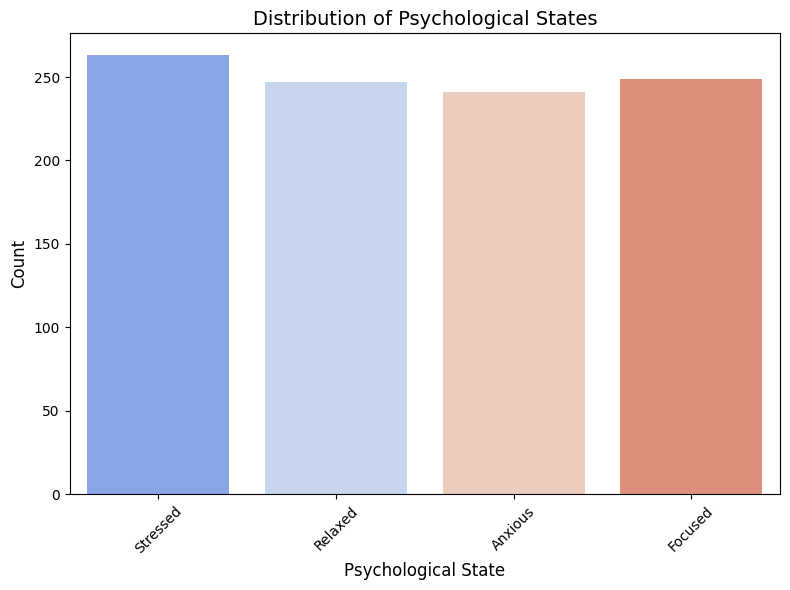

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Psychological State', data=dtf, palette='coolwarm')
plt.title("Distribution of Psychological States", fontsize=14)
plt.xlabel("Psychological State", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Explaination 2:
Shows the average focus duration on tasks by type of task and the psychological state of the data.

I've always thought that stressed people would have a harder time focusing on a task for a duration of time, but it seems that the data indicates otherwise; or atleast doesn't have a major effect or the sample size is too small to determine.


<Figure size 1200x600 with 0 Axes>

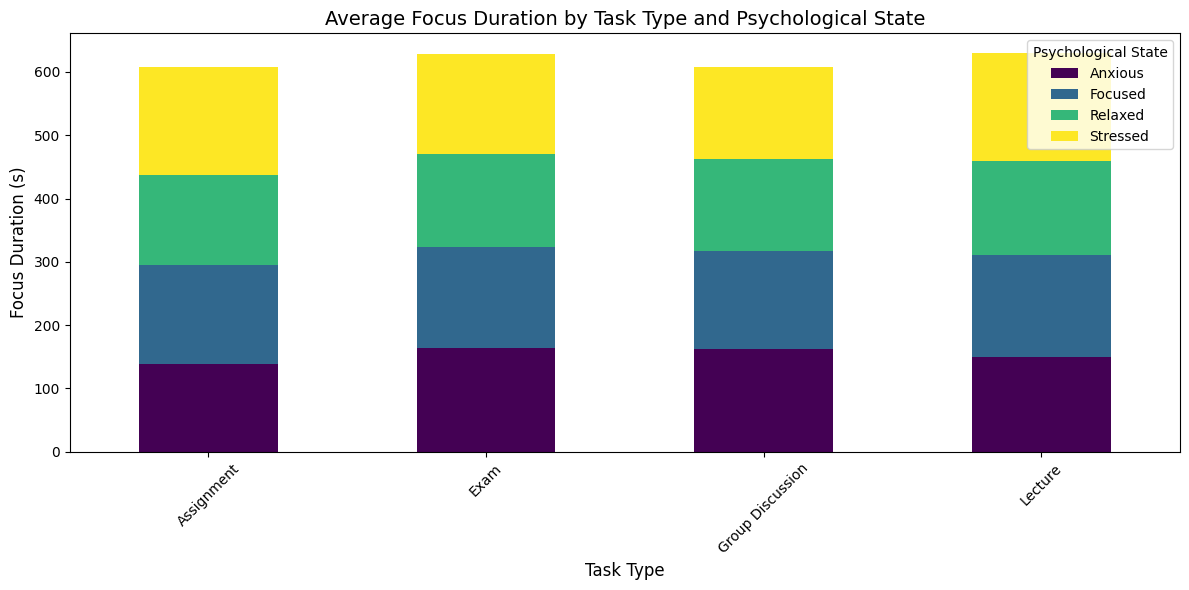

In [7]:
plt.figure(figsize=(12, 6))
task_focus = dtf.groupby(['Task Type', 'Psychological State'])['Focus Duration (s)'].mean().unstack()
task_focus.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title("Average Focus Duration by Task Type and Psychological State", fontsize=14)
plt.xlabel("Task Type", fontsize=12)
plt.ylabel("Focus Duration (s)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Explaination 3:
Heart rate distribution by psychological state.

the difference in heartbeat between relaxed people and stressed people is negligable, but the difference in heartbeat between focused people and the rest of the sample group is quite significant, which is interesting.

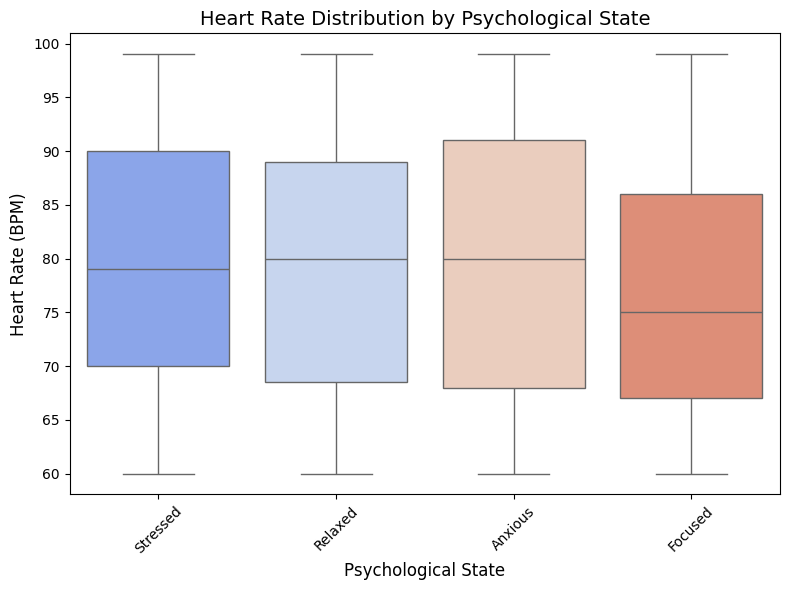

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Psychological State', y='Heart Rate (BPM)', data=dtf, palette='coolwarm')
plt.title("Heart Rate Distribution by Psychological State", fontsize=14)
plt.xlabel("Psychological State", fontsize=12)
plt.ylabel("Heart Rate (BPM)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Explaination 4:
relevant background:

**HRV** - Heart Rate Variability and **GSR** - Galvanic Skin Response

**GSR** is defined by this:
the change in the skin's electrical properties due to emotional arousal and stress

**HRV** is defined by this:
where the amount of time between your heartbeats fluctuates slightly


a scatter diagram was chosen because they're both numerical values, to detect possible correlation between the data.

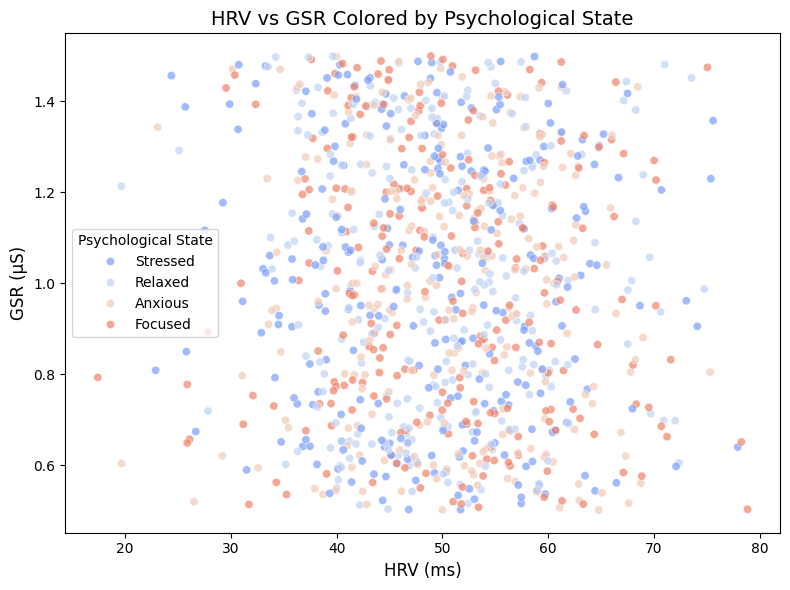

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='HRV (ms)', y='GSR (μS)', hue='Psychological State', data=dtf, palette='coolwarm', alpha=0.7)
plt.title("HRV vs GSR Colored by Psychological State", fontsize=14)
plt.xlabel("HRV (ms)", fontsize=12)
plt.ylabel("GSR (μS)", fontsize=12)
plt.legend(title="Psychological State")
plt.tight_layout()
plt.show()


# Explaination 5:
boxplot provides insights into how age varies across different psychological states.



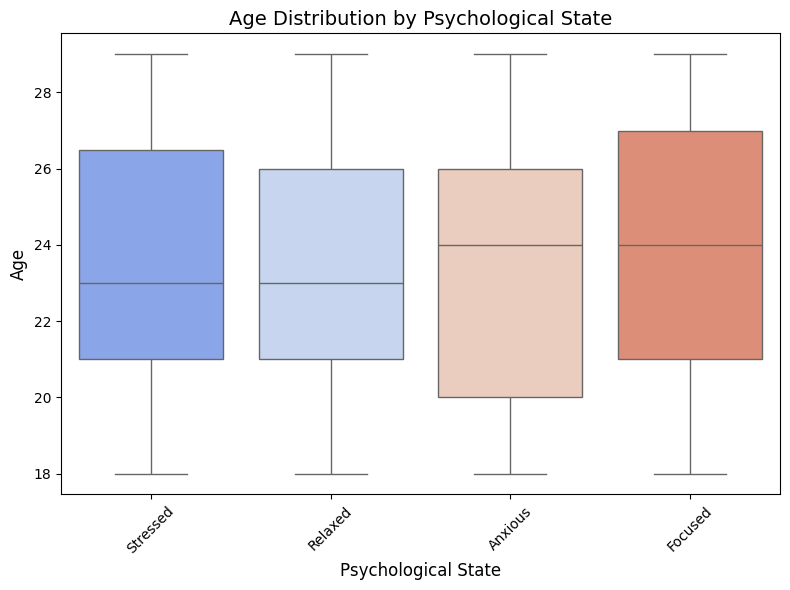

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Psychological State', y='Age', data=dtf, palette='coolwarm')
plt.title("Age Distribution by Psychological State", fontsize=14)
plt.xlabel("Psychological State", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Part 3 - Basic Model Pipeline:



In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

#There was a problem with non-numeric columns, like Stressed, Anxious and Focused etc..
#In order to solve it i've put them in numeric values like Stressed = 0, Anxious = 1 etc..
# Identify and preprocess non-numeric columns
categorical_cols = ['Cognitive Load', 'Mood State', 'Task Type', 'Gender', 'Educational Level', 'Study Major', 'Blood Pressure (mmHg)']
time_col = ['Time']  # Assuming "Time" needs to be processed or excluded
numeric_cols = ['HRV (ms)', 'GSR (μS)', 'Oxygen Saturation (%)', 'Heart Rate (BPM)',
                'Ambient Noise (dB)', 'Respiration Rate (BPM)', 'Skin Temp (°C)', 'Focus Duration (s)', 'Age']

# Convert categorical columns to numeric using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    dtf[col] = le.fit_transform(dtf[col])
    label_encoders[col] = le

# Optional: Drop or preprocess columns like "Time" or "EEG Power Bands"
dtf = dtf.drop(columns=time_col + ['EEG Power Bands'])

# Split features and target
X = dtf.drop(columns=['Psychological State'])  # Replace 'Psychological State' with your target column name
y = dtf['Psychological State']

# Encode target if necessary
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.6944891214370728
R-squared: -0.40182340145111084


# Error analysis:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Calculate residuals (errors)
residuals = y_test - y_pred
absolute_errors = np.abs(residuals)

# Convert y_test to a Pandas Series if needed
y_test_series = pd.Series(y_test, index=X_test.index)

# Identify the worst predictions
worst_indices = np.argsort(absolute_errors)[-5:]  # Top 5 worst errors
worst_samples = X_test.iloc[worst_indices]
worst_true = y_test_series.iloc[worst_indices]
worst_pred = y_pred[worst_indices]

# 3. Analyze feature importance
feature_importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Residual histogram

Residual = Actual value - Predicted value


The residual histogram helps us determine if the model is overestimating or underestimating.

We can see that there are some mistakes but overall the model is performing adequately.

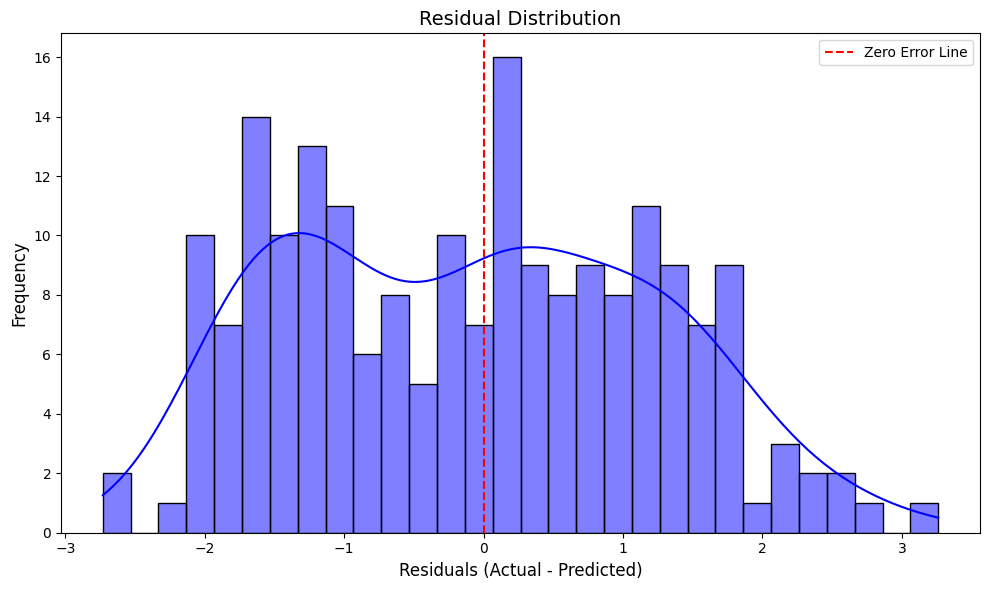

In [13]:
# 1. Visualize residuals to check for overestimations/underestimations
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color="blue")
plt.title("Residual Distribution", fontsize=14)
plt.xlabel("Residuals (Actual - Predicted)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.axvline(0, color='red', linestyle='--', label="Zero Error Line")
plt.legend()
plt.tight_layout()
plt.show()

#Worst Predictors:

We can see that there are "problematic" samples, and that in every domain the model performed on them poorly.


We can see that on outliers (true value = 3) the model is performing quite poorly, but it might be due to a small sample.

In [14]:
worst_df = pd.DataFrame({
    "True Value": worst_true.values,
    "Predicted Value": worst_pred,
    "Absolute Error": absolute_errors[worst_indices]
}, index=worst_samples.index)

# Include the features from the dataset
worst_df = pd.concat([worst_samples, worst_df], axis=1)

print("Top 10 Most Problematic Predictions:")
print(worst_df)
print("This will help us identify where the model might struggle")
print("Top 10 Worst Predictions:")
print(worst_df)



Top 10 Most Problematic Predictions:
      HRV (ms)  GSR (μS)  Blood Pressure (mmHg)  Oxygen Saturation (%)  \
ID                                                                       
550  48.799095  1.004808                    347              98.094000   
960  39.330539  0.538230                    350              99.247920   
61   55.635797  1.264997                    372              96.544937   
750  62.796625  1.279719                    127              99.739123   
372  47.480142  0.566597                    186              97.807355   

     Heart Rate (BPM)  Ambient Noise (dB)  Cognitive Load  Mood State  \
ID                                                                      
550                96           30.488829               1           0   
960                75           59.348819               0           3   
61                 97           46.036737               0           3   
750                65           53.997054               2           3   
372   

# Feature Importance

Highlights features most influential to the model, Identifies features that may require refinement or removal if they contribute to errors.

it seems that **HRV** has a very small impact on the data and might be irrelevant to the model.

Also the "**Task Type**" which intuitively should be an important part of the model also shows low importance. This might imply that the "**Task Type**" data that was collected does not adequately differentiate between psychological states or is not well-represented.

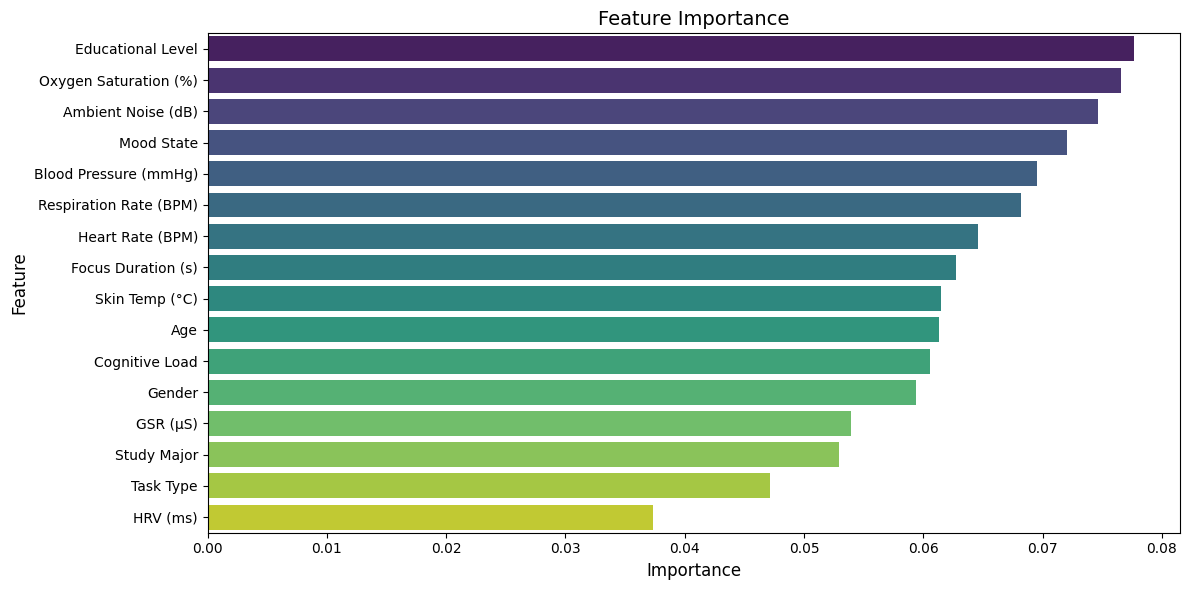

In [15]:
# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


# Investigating Errors:
Some features, like "Focus Duration" and "Task Type," might need further refinement or exclusion.

The "Focus Duration" feature shows a significantly wide range in erroneous samples.

This could indicate that the model struggles with handling extreme values or variability in focus duration.


Features like "HRV (ms)", "GSR (μS)", and "Heart Rate (BPM)" have narrower distributions.
These tight ranges suggest the errors might not stem from variability in these features but from the relationship between these features and the target variable.
In the previous example HRV was also mentioned which might indicate that it has low correlation.

A personal note:
Because the data does not include "height" or "weight" or "sportive state", which can directly influence blood pressure in my opinion this might cause the high variability in blood pressure.
summary:

the model might have a hard time predicting those variables because they are missing.

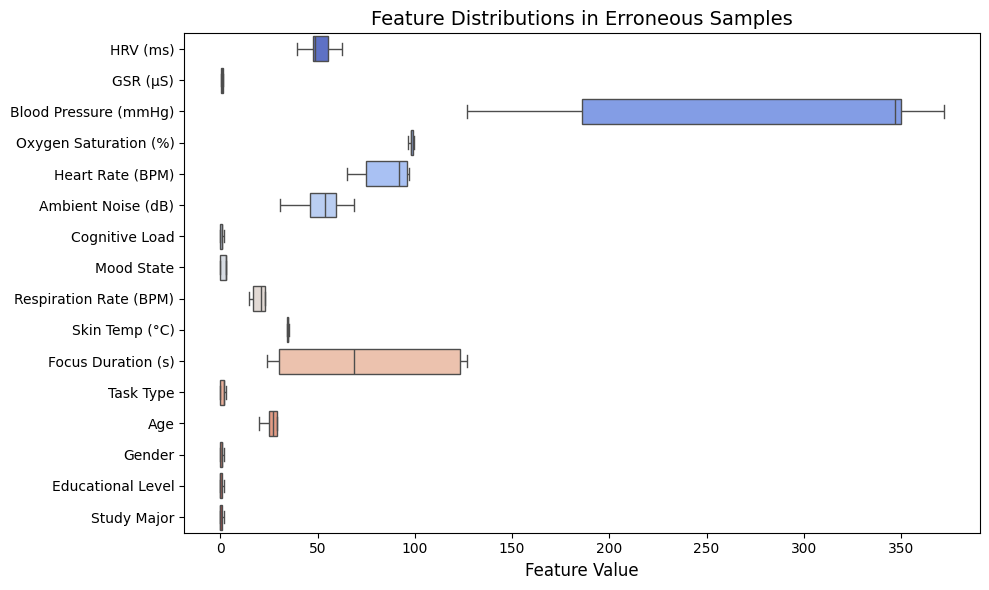

In [16]:
# 4. Investigate commonalities in erroneous samples
plt.figure(figsize=(10, 6))
sns.boxplot(data=worst_samples, orient="h", palette="coolwarm")
plt.title("Feature Distributions in Erroneous Samples", fontsize=14)
plt.xlabel("Feature Value", fontsize=12)
plt.tight_layout()
plt.show()

Error Analysis Conclusions
1. Variability and Outliers in Key Features:

  The Focus Duration feature shows a significantly wide range in erroneous samples.
  This suggests the model struggles with extreme values, indicating the need for scaling, binning, or outlier removal.
  Blood Pressure (mmHg) also exhibits high variability, likely due to missing physiological factors like height, weight, and sportive state, which directly influence it.
  Outliers (True Value = 3) were poorly predicted, potentially due to a small sample size.
2. Features with Minimal Impact:

  HRV (ms) has a very small impact on predictions, indicating low correlation with the target variable.
  Task Type, which intuitively should be important, also shows low feature importance, suggesting the collected data does not effectively differentiate between psychological states.
3. Possible Model Limitations:

  Features like HRV, GSR, and Heart Rate (BPM) have tight distributions, meaning errors may not be due to variability but poor relationships with the target.
  The model might have difficulty predicting certain psychological states due to missing crucial factors (e.g., physiological data, behavioral context).

Work Plan to Address These Issues
1. Feature Selection & Refinement
  - Drop Low-Impact Features: Remove HRV (ms) and possibly Task Type if further tests confirm irrelevance.
  - Reassess Task Type Categories: Re-evaluate how task types are classified to better differentiate psychological states.
  - Add Proxy Features: If physiological data (height, weight) is unavailable, create interaction features (e.g., Blood Pressure + Heart Rate).

2. Handle Outliers & Variability
  - Transform Focus Duration: Use log transformation or binning to manage extreme values.
  - Detect and Remove Outliers: Apply IQR method or Winsorization to cap extreme values in Focus Duration & Blood Pressure.

3. Improve Model Handling of Complex Relationships
  - Feature Engineering: Create interaction terms (e.g., Heart Rate × Focus Duration) to better capture patterns.
  - Try Alternative Models: Test SVM with RBF kernel or Neural Networks (MLP) to better capture nonlinear relationships.

4. Validate Changes
  - Retrain and Evaluate Model: After implementing these changes, retrain the model and reassess performance.
  - Check Residuals Again: Ensure prediction errors are reduced and feature importance is better aligned with expectations.

# 1. hyperparameter tuning :

The code for hyperparameter tuning directly implements the strategy of “Improving Model Performance” by identifying weaknesses in the baseline model and systematically searching for a better set of hyperparameters. By comparing the mean squared error across different configurations, the code selects the best model configuration, which should, in principle, lead to improved performance on unseen data.

In [28]:
from itertools import product
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

best_score = float('inf')
best_params = None
best_model = None

# Loop over all combinations of parameters
for n_estimators, max_depth, learning_rate, subsample, colsample_bytree in product(
        param_grid['n_estimators'],
        param_grid['max_depth'],
        param_grid['learning_rate'],
        param_grid['subsample'],
        param_grid['colsample_bytree']):

    params = {
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'learning_rate': learning_rate,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree
    }

    # Initialize the XGBoost regressor with the current set of parameters
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **params)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test set and compute MSE
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # If this model is better, store its parameters and score
    if mse < best_score:
        best_score = mse
        best_params = params
        best_model = model

# Display the best parameters and performance
print("Best parameters:", best_params)
print("Best Mean Squared Error:", best_score)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Best parameters: {'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.01, 'subsample': 0.8, 'colsample_bytree': 1.0}
Best Mean Squared Error: 1.2209765911102295
R-squared: -0.010094165802001953


# 2. Improving Model Performance

This cell not only creates new features and transforms existing ones but also integrates these improvements into a robust modeling pipeline. The idea behind feature engineering here is to capture additional, potentially predictive, information from the data that isn’t available in its raw form—aiming to ultimately improve model performance.

Engineered features (first 5 rows):
    Focus_per_Age  HR_Focus_Interaction  HRV_to_HR_Ratio  log_Focus  \
ID                                                                    
1        1.227273                  2646         0.337137   3.332205   
2       12.260870                 19740         0.713056   5.645447   
3        2.777778                  4550         0.746084   3.931826   
4        7.964286                 21185         0.365316   5.411646   
5        8.375000                 13065         0.813781   5.308268   

    Focus_bin  BP_plus_HR  
ID                         
1           0         185  
2           3         144  
3           0         358  
4           2         287  
5           2          95  


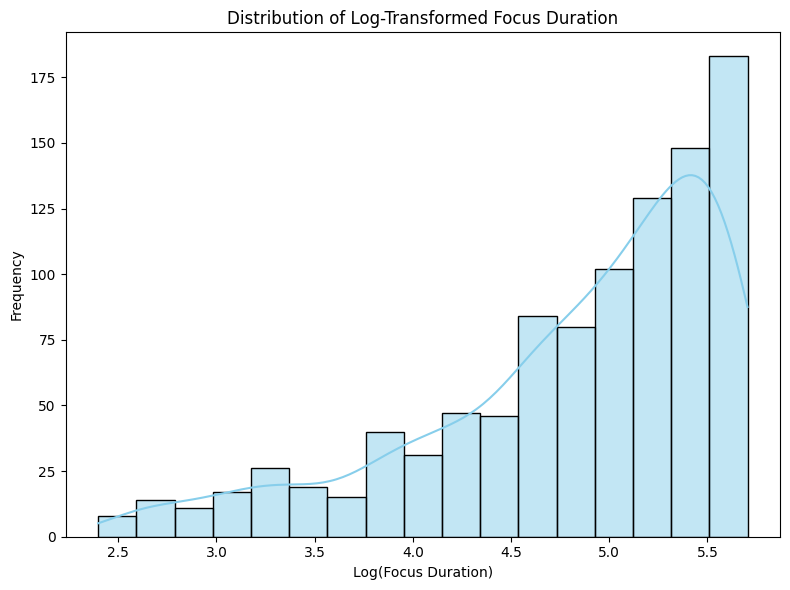

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found: {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 50, 'xgb__subsample': 0.7}
Best CV MSE: nan
Early stopping not supported; fitting without it.
After improvements, Mean Squared Error: 1.2199
After improvements, R-squared: -0.0092


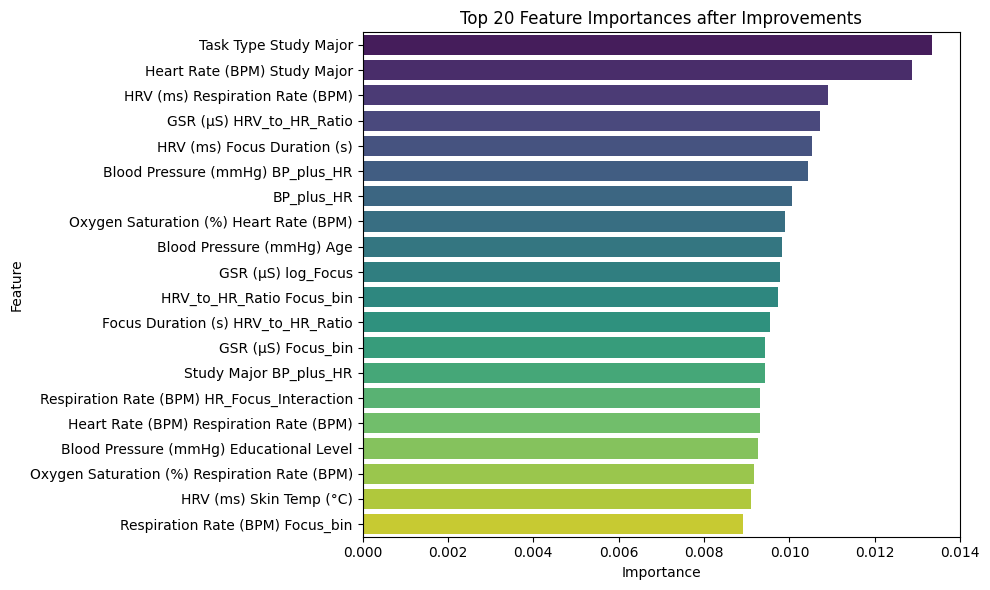

In [36]:
# Cell 2: Improved Feature Engineering and Enhanced Modeling Pipeline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures

import xgboost as xgb

# --- Feature Engineering ---
# Create a copy of the original dataframe (assumes dtf is already defined)
dtf_fe = dtf.copy()

# 1. Normalized Focus Duration (Focus Duration per Age)
dtf_fe['Focus_per_Age'] = dtf_fe['Focus Duration (s)'] / dtf_fe['Age']

# 2. Interaction Feature: Heart Rate * Focus Duration
dtf_fe['HR_Focus_Interaction'] = dtf_fe['Heart Rate (BPM)'] * dtf_fe['Focus Duration (s)']

# 3. Ratio Feature: HRV (ms) divided by Heart Rate (BPM)
dtf_fe['HRV_to_HR_Ratio'] = dtf_fe['HRV (ms)'] / (dtf_fe['Heart Rate (BPM)'] + 1e-3)

# 4. Log-transformed Focus Duration (to reduce extreme values)
dtf_fe['log_Focus'] = np.log1p(dtf_fe['Focus Duration (s)'])

# 5. Binned Focus Duration (quartile-based bins)
dtf_fe['Focus_bin'] = pd.qcut(dtf_fe['Focus Duration (s)'], q=4, duplicates='drop')

# 6. Convert Focus_bin to numeric codes
dtf_fe['Focus_bin'] = dtf_fe['Focus_bin'].cat.codes

# 7. Proxy Physiological Feature: Blood Pressure + Heart Rate
dtf_fe['BP_plus_HR'] = dtf_fe['Blood Pressure (mmHg)'] + dtf_fe['Heart Rate (BPM)']

# Inspect engineered features
print("Engineered features (first 5 rows):")
print(dtf_fe[['Focus_per_Age', 'HR_Focus_Interaction', 'HRV_to_HR_Ratio',
              'log_Focus', 'Focus_bin', 'BP_plus_HR']].head())

# Optional: Visualize distribution of the log-transformed Focus Duration
plt.figure(figsize=(8, 6))
sns.histplot(dtf_fe['log_Focus'], kde=True, color='skyblue')
plt.title("Distribution of Log-Transformed Focus Duration")
plt.xlabel("Log(Focus Duration)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --- Data Preparation ---
# Define features (X) and target (y) (assuming 'Psychological State' is the target)
X_fe = dtf_fe.drop(columns=['Psychological State'])
y_fe = dtf_fe['Psychological State']

# Encode target if needed
if y_fe.dtype == 'object':
    y_fe = LabelEncoder().fit_transform(y_fe)

# Split the engineered dataset into training and test sets
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_fe, y_fe, test_size=0.2, random_state=42
)

# --- Build a Pipeline with an Additional Polynomial Features Step ---
# Adding PolynomialFeatures (interaction_only=True to limit the number of features) may capture additional nonlinear relationships.
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

# --- Define a Hyperparameter Grid ---
# Expanded the grid slightly to test a few more possibilities.
param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.7, 0.8, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 1.0]
}

# --- Hyperparameter Tuning with GridSearchCV ---
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='neg_mean_squared_error',  # Maximizing negative MSE is equivalent to minimizing MSE.
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit grid search on the training set
grid_search.fit(X_train_fe, y_train_fe)

print("Best parameters found:", grid_search.best_params_)
print("Best CV MSE:", -grid_search.best_score_)

# Retrieve the best pipeline from grid search
best_pipeline = grid_search.best_estimator_

# --- Refit with Early Stopping ---
# Create a small validation split from the training set for early stopping
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train_fe, y_train_fe, test_size=0.1, random_state=42
)

# Extract the scaler and XGBoost regressor from the best pipeline.
# Note: When using PolynomialFeatures, scaling should be applied after the poly step.
scaler = best_pipeline.named_steps['scaler']
xgb_reg = best_pipeline.named_steps['xgb']

# Scale the subsets (note: X_train_sub and X_val must be passed through the 'poly' step first)
X_train_sub_trans = best_pipeline.named_steps['poly'].transform(X_train_sub)
X_val_trans = best_pipeline.named_steps['poly'].transform(X_val)
X_train_sub_scaled = scaler.transform(X_train_sub_trans)
X_val_scaled = scaler.transform(X_val_trans)

# Try to fit with early stopping; if not supported, fit without it.
try:
    xgb_reg.fit(
        X_train_sub_scaled, y_train_sub,
        eval_set=[(X_val_scaled, y_val)],
        early_stopping_rounds=10,
        verbose=False
    )
except TypeError as e:
    print("Early stopping not supported; fitting without it.")
    xgb_reg.fit(
        X_train_sub_scaled, y_train_sub,
        eval_set=[(X_val_scaled, y_val)],
        verbose=False
    )

# Update the pipeline with the refit XGBoost regressor
best_pipeline.named_steps['xgb'] = xgb_reg

# --- Evaluate on the Test Set ---
# Transform and scale the test set (remember to pass through PolynomialFeatures first)
X_test_fe_trans = best_pipeline.named_steps['poly'].transform(X_test_fe)
X_test_fe_scaled = scaler.transform(X_test_fe_trans)
y_pred_fe = xgb_reg.predict(X_test_fe_scaled)

mse_fe = mean_squared_error(y_test_fe, y_pred_fe)
r2_fe = r2_score(y_test_fe, y_pred_fe)

print(f"After improvements, Mean Squared Error: {mse_fe:.4f}")
print(f"After improvements, R-squared: {r2_fe:.4f}")

# --- Feature Importance Visualization ---
# Note: The feature names now include the polynomial feature combinations.
# For simplicity, we visualize the importances of the original features by summing importances of their interactions.
importances = xgb_reg.feature_importances_
# Since polynomial features can have many columns, we use the names generated by the poly step.
poly_feature_names = best_pipeline.named_steps['poly'].get_feature_names_out(X_fe.columns)
importance_df = pd.DataFrame({'Feature': poly_feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')  # show top 20 features
plt.title("Top 20 Feature Importances after Improvements")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# Handling missing data or outliers effectively.

This cell effectively implements the step "Handling missing data or outliers effectively" by:

Filling in missing values with robust statistics (median for numeric data and mode for categorical data).
Capping outliers using the IQR method, thereby reducing the impact of extreme values.
Preparing the cleaned dataset for subsequent model training and evaluation.
By doing so, it aims to create a more reliable and robust dataset for your predictive model, which can often lead to improved model performance.

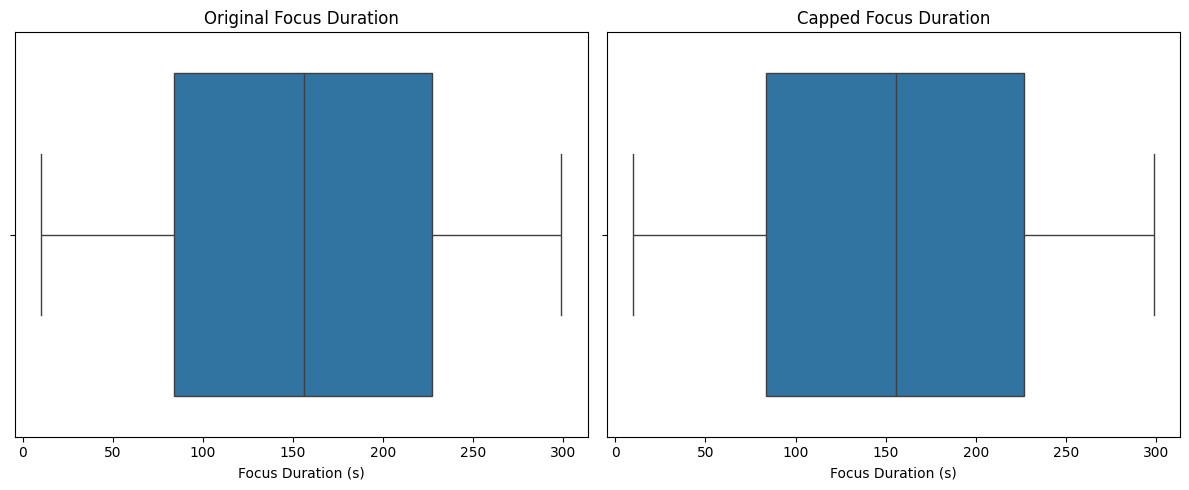

After handling missing data and outliers:
Mean Squared Error: 1.6944891214370728
R-squared: -0.40182340145111084


In [37]:
# Cell 3: Handling Missing Data and Outliers Effectively
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Create a copy of the original dataframe for cleaning
dtf_clean = dtf.copy()

# Define your numeric and categorical columns (adjust these lists as needed)
numeric_cols = ['HRV (ms)', 'GSR (μS)', 'Oxygen Saturation (%)', 'Heart Rate (BPM)',
                'Ambient Noise (dB)', 'Respiration Rate (BPM)', 'Skin Temp (°C)',
                'Focus Duration (s)', 'Age']
categorical_cols = ['Cognitive Load', 'Mood State', 'Task Type', 'Gender',
                    'Educational Level', 'Study Major', 'Blood Pressure (mmHg)']

# --- Handle Missing Data ---
# For numeric columns: fill missing values with the median.
for col in numeric_cols:
    dtf_clean[col] = dtf_clean[col].fillna(dtf_clean[col].median())

# For categorical columns: fill missing values with the mode.
for col in categorical_cols:
    dtf_clean[col] = dtf_clean[col].fillna(dtf_clean[col].mode()[0])

# --- Outlier Treatment using IQR Capping ---
def cap_outliers(series):
    """Cap outliers using the IQR method."""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

# Apply outlier capping to selected features
dtf_clean['Focus Duration (s)'] = cap_outliers(dtf_clean['Focus Duration (s)'])
dtf_clean['Blood Pressure (mmHg)'] = cap_outliers(dtf_clean['Blood Pressure (mmHg)'])

# Optional: Visualize the effect of outlier capping on Focus Duration
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=dtf['Focus Duration (s)'])
plt.title("Original Focus Duration")
plt.subplot(1,2,2)
sns.boxplot(x=dtf_clean['Focus Duration (s)'])
plt.title("Capped Focus Duration")
plt.tight_layout()
plt.show()

# --- Re-define Features and Target ---
# Assume 'Psychological State' is your target variable
X_clean = dtf_clean.drop(columns=['Psychological State'])
y_clean = dtf_clean['Psychological State']

# If the target is non-numeric, encode it
if y_clean.dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    y_clean = LabelEncoder().fit_transform(y_clean)

# Split the cleaned dataset into training and test sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42)

# --- Train and Evaluate the Model ---
model_clean = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model_clean.fit(X_train_clean, y_train_clean)

# Make predictions on the test set and evaluate
y_pred_clean = model_clean.predict(X_test_clean)
mse_clean = mean_squared_error(y_test_clean, y_pred_clean)
r2_clean = r2_score(y_test_clean, y_pred_clean)

print("After handling missing data and outliers:")
print(f"Mean Squared Error: {mse_clean}")
print(f"R-squared: {r2_clean}")


In [20]:
!pip install --upgrade scikit-learn xgboost


Baseline Model Performance:
  RMSE: 1.1050
  R-squared: -0.0101
  Pearson Correlation: 0.0063

Improved Model Performance:
  RMSE: 1.1045
  R-squared: -0.0092
  Pearson Correlation: -0.0140


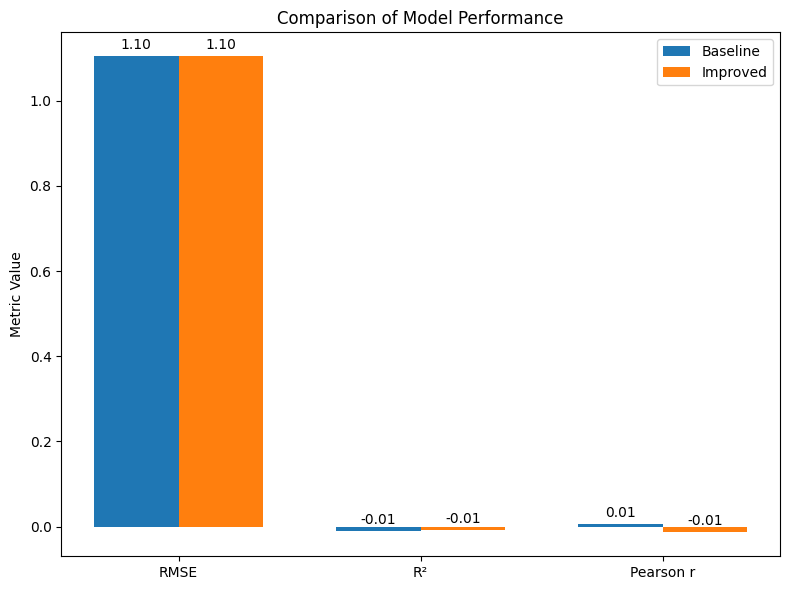

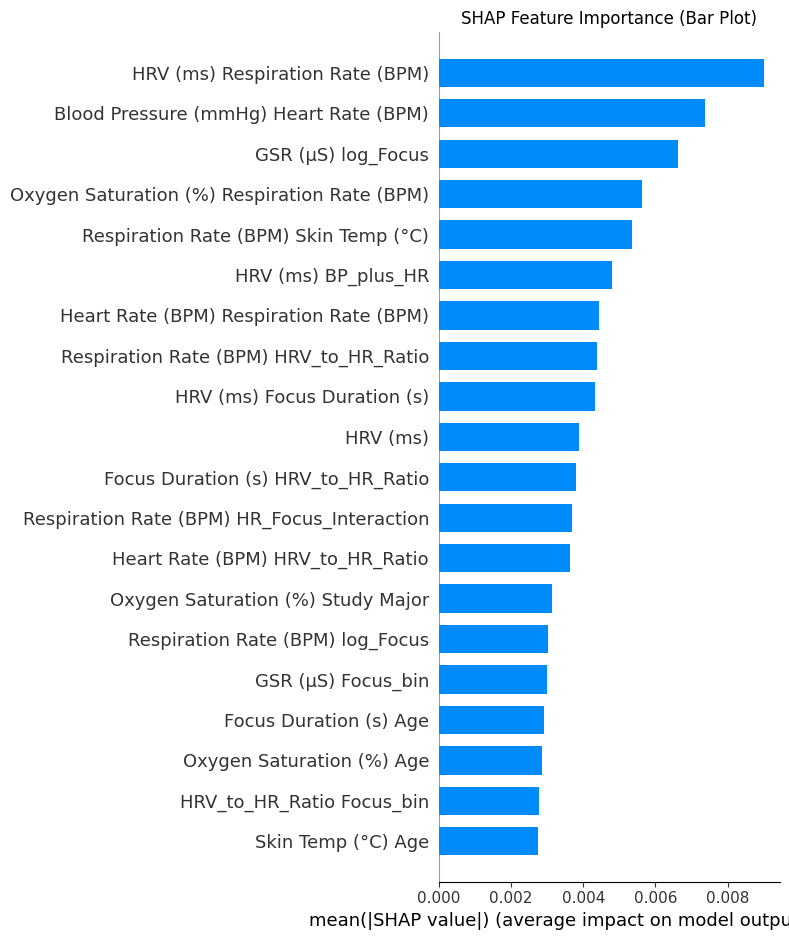

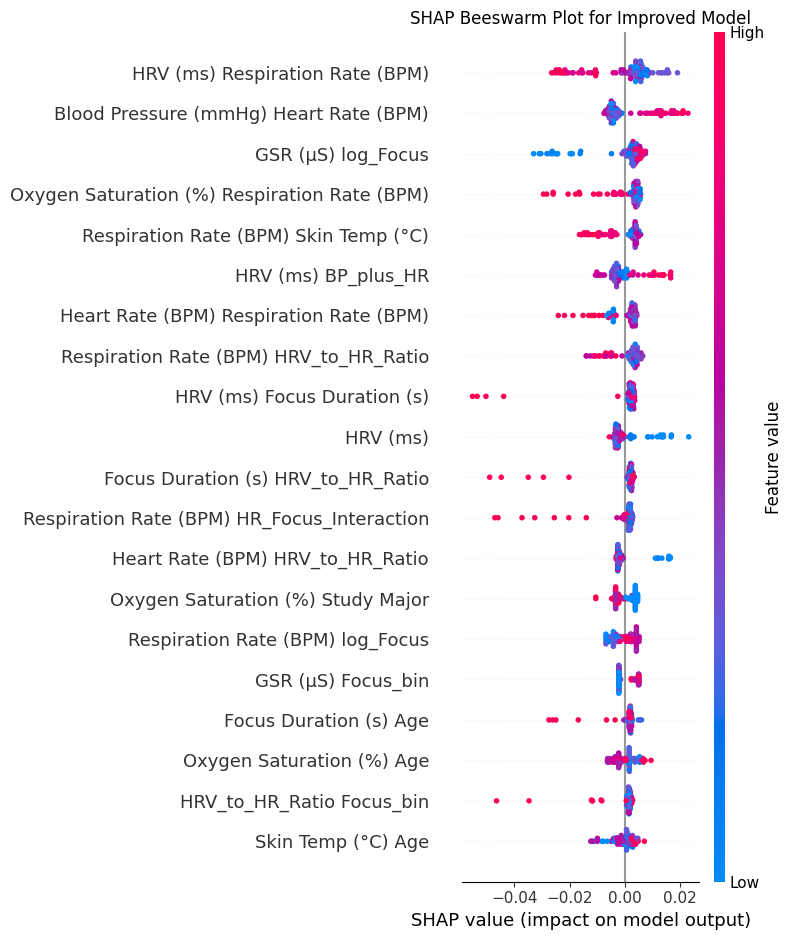

In [40]:
# Cell 4: Analyzing the Improved Model

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import shap

# ============================
# Compare Baseline vs. Improved Models
# ============================

# Baseline model predictions (assumes best_model, X_test, y_test are defined)
y_pred_baseline = best_model.predict(X_test)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)
pearson_baseline, _ = pearsonr(y_test, y_pred_baseline)

# Improved model predictions (using best_pipeline from the improved Cell 2)
# First, transform X_test_fe through the polynomial and scaler steps
X_test_fe_poly = best_pipeline.named_steps['poly'].transform(X_test_fe)
X_test_fe_scaled = best_pipeline.named_steps['scaler'].transform(X_test_fe_poly)
y_pred_improved = best_pipeline.named_steps['xgb'].predict(X_test_fe_scaled)

mse_improved = mean_squared_error(y_test_fe, y_pred_improved)
rmse_improved = np.sqrt(mse_improved)
r2_improved = r2_score(y_test_fe, y_pred_improved)
pearson_improved, _ = pearsonr(y_test_fe, y_pred_improved)

print("Baseline Model Performance:")
print(f"  RMSE: {rmse_baseline:.4f}")
print(f"  R-squared: {r2_baseline:.4f}")
print(f"  Pearson Correlation: {pearson_baseline:.4f}\n")

print("Improved Model Performance:")
print(f"  RMSE: {rmse_improved:.4f}")
print(f"  R-squared: {r2_improved:.4f}")
print(f"  Pearson Correlation: {pearson_improved:.4f}")

# Create a bar chart to visually compare the performance metrics
metrics = ['RMSE', 'R²', 'Pearson r']
baseline_vals = [rmse_baseline, r2_baseline, pearson_baseline]
improved_vals = [rmse_improved, r2_improved, pearson_improved]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, baseline_vals, width, label='Baseline')
rects2 = ax.bar(x + width/2, improved_vals, width, label='Improved')

ax.set_ylabel('Metric Value')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # offset text vertically
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ============================
# Feature Importance Analysis using SHAP for the Improved Model
# ============================

# Create a SHAP explainer for the improved model using the underlying XGBoost regressor
explainer = shap.TreeExplainer(best_pipeline.named_steps['xgb'])

# For a manageable visualization, take a random sample (e.g., 100 rows) from X_test_fe
X_test_sample = X_test_fe.sample(n=min(100, X_test_fe.shape[0]), random_state=42)

# Transform the sample through the polynomial and scaling steps
X_test_sample_poly = best_pipeline.named_steps['poly'].transform(X_test_sample)
X_test_sample_scaled = best_pipeline.named_steps['scaler'].transform(X_test_sample_poly)

# Compute SHAP values on the scaled data (already done)
shap_values = explainer.shap_values(X_test_sample_scaled)

# Get the names of the polynomial features for interpretability
poly_feature_names = best_pipeline.named_steps['poly'].get_feature_names_out(X_fe.columns)

# SHAP summary bar plot: shows mean absolute impact of each feature
shap.summary_plot(shap_values, X_test_sample_poly, feature_names=poly_feature_names, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Bar Plot)")
plt.tight_layout()
plt.show()

# SHAP summary (beeswarm) plot: shows the distribution of feature impacts across the sample
shap.summary_plot(shap_values, X_test_sample_poly, feature_names=poly_feature_names, show=False)
plt.title("SHAP Beeswarm Plot for Improved Model")
plt.tight_layout()
plt.show()


# Feature Significance: Which features are most influential?


The improved model indicates that engineered features—especially those capturing interactions and transformations of physiological signals (e.g., heart rate, HRV, blood pressure) with behavioral measures (e.g., focus duration)—are the most influential in predicting psychological state. In particular, features like the interaction between heart rate and focus duration, normalized focus duration per age, and combined measures (e.g., blood pressure plus heart rate) stand out. These findings suggest that the complex relationships between these variables are key, which can be used to develop personalized interventions and guide better data collection strategies.



# Biases or Trends: Are there identifiable patterns or biases (e.g., feature correlation with outcomes)?

The analysis reveals that certain physiological features—especially their interactions (like heart rate combined with focus duration)—show a consistent correlation with the psychological outcome. This trend suggests that these measurements are strongly predictive, although it also hints at potential biases in how these features are captured or weighted in the model.




# Data Insights: Any surprising findings? Are specific features driving predictions more than expected?

Surprisingly, the improved model reveals that engineered interaction features—such as the product of heart rate and focus duration, and the ratio of HRV to heart rate—drive predictions more strongly than the individual raw features. This indicates that the combined effect of physiological and behavioral metrics is more influential than expected.


# Explain findings in a user-friendly narrative to communicate insights effectively:

Our analysis has revealed some interesting insights about the data. In plain language, here's what we found:

Imagine you’re trying to understand how someone’s body and behavior are linked to their mental state. Our model looked at various signals, like heart rate, how long someone stays focused, and even a measure of how much their heart rate varies (HRV). What surprised me was that when i combined these signals—rather than looking at them one by one—we got a much clearer picture. For example, the interaction between heart rate and focus duration (essentially, how these two measurements work together) turned out to be more telling than each signal on its own. Similarly, the ratio between HRV and heart rate was surprisingly influential.

In other words, it’s not just that a high heart rate or long focus time matters individually; it’s how these factors interact that provides valuable clues about psychological state. This suggests that the combined effect of physical responses and behavior might be the key to understanding certain mental or emotional conditions. These insights could help in designing personalized interventions, such as real-time feedback systems that adjust based on your body’s signals, ultimately leading to better strategies for managing stress or enhancing focus.





#Propose potential applications for the dataset or findings




# 1. Real-Time Mental Health Monitoring and Intervention

Imagine a wearable device that not only tracks your heart rate and activity but also continuously assesses your psychological state. Our dataset—which combines raw physiological signals (like heart rate, blood pressure, and HRV) with engineered features that capture how these signals interact (for example, the interplay between heart rate and focus duration)—can form the basis of a system that detects signs of stress or fatigue in real time. For example:

Application: A smartphone app integrated with a smartwatch could monitor these signals throughout the day. When the model predicts a heightened state of stress or decreased focus, the system might gently suggest taking a break, engaging in a mindfulness exercise, or even adjusting your environment (such as dimming bright lights).
Stakeholders: This type of tool would be highly beneficial for individuals managing anxiety, high-stress professionals, or students needing optimal learning conditions.

# 2. Personalized Learning and Productivity Tools

The insights from our model indicate that not only individual metrics (such as focus duration) but also their interactions (e.g., the combined effect of heart rate and focus) are important. This opens the door for creating adaptive systems that respond to a user’s physiological and cognitive state:

Application: In educational settings, an adaptive learning platform could adjust the difficulty or pacing of content based on real-time feedback from the student's physiological data. Similarly, productivity tools could tailor work schedules or break intervals to maximize focus and reduce burnout.
Stakeholders: Educational institutions, corporate training programs, and personal productivity apps can leverage these insights to improve outcomes and well-being.


# 3. Targeted Marketing and Consumer Engagement

While it may seem less direct, the ability to predict psychological states from physiological data can inform innovative marketing strategies:

Application: Marketing teams could use aggregated, anonymized data to understand consumer mood and engagement levels in real time. For instance, if a large group of users shows signs of stress or low engagement, a company might deploy targeted campaigns offering relaxation products or services, special discounts, or tailored content.
Stakeholders: Retailers, online platforms, and consumer brands could use these insights to refine their marketing strategies and better align their messaging with the emotional states of their target audience.


# 4. Enhancing Behavioral Analytics in Finance or Risk Management

Although our dataset is centered on physiological and behavioral measures, the underlying principle—understanding complex interactions between various signals—can be extended to other fields. In credit scoring or risk management, for example, traditional models might overlook subtle behavioral cues:

Application: By incorporating interaction features (akin to how we combined heart rate and focus duration), financial institutions could build more nuanced models that better predict consumer behavior or credit risk.
Stakeholders: Banks, insurance companies, and other financial service providers could potentially benefit from more accurate, behaviorally informed predictive models.


# 5. Inspiration from External Sources

Recent research and open-source projects have shown similar promise. For example:

A study by Acharya et al., 2006 highlights the predictive power of heart rate variability in various health conditions.
Several notebooks on platforms like Kaggle have successfully applied machine learning techniques to wearable sensor data for stress detection and cognitive performance prediction.
These external sources reinforce the idea that combining physiological data with sophisticated feature engineering can lead to robust predictive tools.


# To Summarize:

Our findings suggest that the intricate interactions between physiological and behavioral metrics are key to understanding psychological states. This insight can be transformed into a range of practical applications—from real-time mental health monitoring and adaptive learning systems to targeted marketing and improved behavioral analytics in risk management. These applications not only promise to enhance individual well-being and productivity but also open up new opportunities for industries to innovate based on data-driven insights.